## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Nombre y Apellido

***
## Estimación espectral


In [8]:
## Inicialización del Notebook del TP3

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################



<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

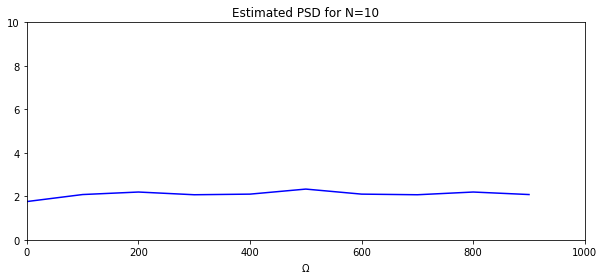

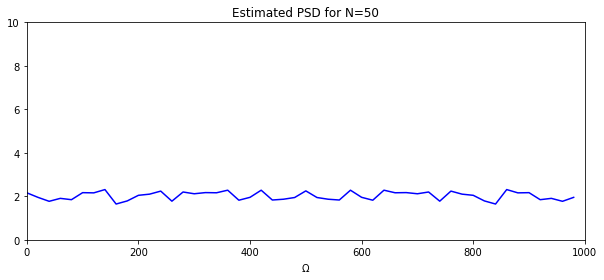

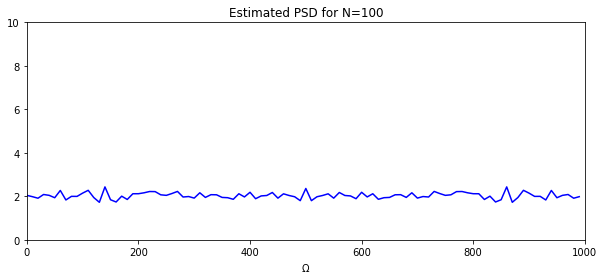

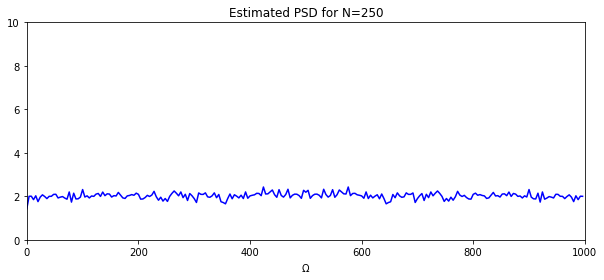

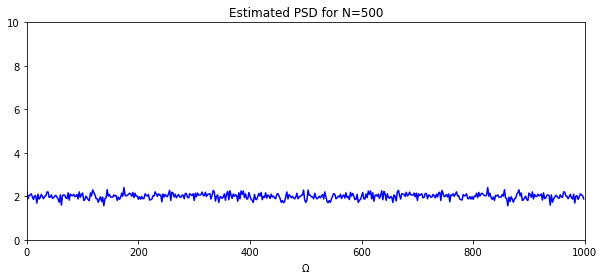

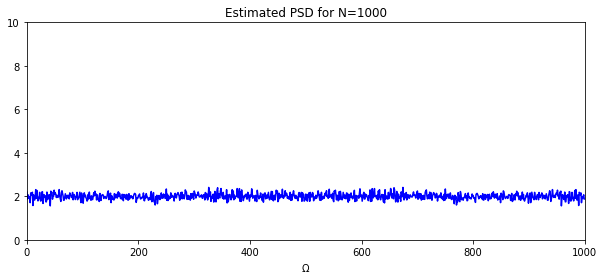

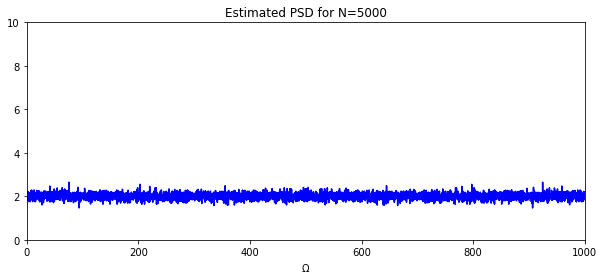

In [9]:
# Simular para los siguientes tamaños de señal
N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 
plt.close()
N=np.array([10,50,100,250,500,1000,5000],dtype=np.float)
media=np.array([0,0,0,0,0,0,0],dtype=np.float)
varianza=np.array([0,0,0,0,0,0,0],dtype=np.float)

M=int(200)  #realizaciones
fs=1000
f0=fs/5
var,med,mu=0,0,0
sigma=(2)**(1/2)

for ii in range(len(N)):
    x=np.zeros((M,int(N[ii])),dtype=np.float)
    X=np.zeros((M,int(N[ii])),dtype=np.complex)
    per=np.zeros((1,int(N[ii])),dtype=np.float)
    periodo_y=np.zeros((1,M),dtype=np.float)
    delta_f=fs/N[ii]
    for jj in range(M):

        x[jj,:] =np.random.normal(mu,sigma,size=int(N[ii]))
        X[jj,:] = np.fft.fft(x[jj,:])
        periodograma=1/N[ii] * np.abs(X[jj,:])**2
        per  +=periodograma
        var +=1/M*np.var(periodograma)
        med +=1/M*np.mean(periodograma) 

        
    Om = np.linspace(0, (N[ii]-1)*delta_f, int (N[ii]))
    plt.figure(figsize=(10,4))
    
    plt.plot(Om, (per.flatten()/M), 'b', label=r'$\Phi_{xx}(e^{j \Omega})$')
    plt.title('Estimated PSD for N=%d'%(int (N[ii])))
    plt.xlabel(r'$\Omega$')
    plt.axis([0, int(N[ii]*delta_f), 0, 10 ])


    media[ii]=med
    varianza[ii]=var
    var,med=0,0
    
    
    
    
    
    


In [10]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados_per = [ 
                   [media[0]-2, varianza[0]], # <-- acá debería haber numeritos :)
                   [media[1]-2, varianza[1]], # <-- acá debería haber numeritos :)
                   [media[2]-2, varianza[2]], # <-- acá debería haber numeritos :)
                   [media[3]-2, varianza[3]], # <-- acá debería haber numeritos :)
                   [media[4]-2, varianza[4]], # <-- acá debería haber numeritos :)
                   [media[5]-2, varianza[5]], # <-- acá debería haber numeritos :)
                   [media[6]-2, varianza[6]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados_per, columns=['$s_P$', '$v_P$'],
               index=N)
HTML(df.to_html())




,$s_P$,$v_P$
10.0,0.099246,4.308597
50.0,0.021358,3.985420
100.0,0.032938,4.055679
250.0,0.018986,4.023177
500.0,0.001265,3.975859
1000.0,-0.005225,4.039393
5000.0,-0.000763,3.984892


<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

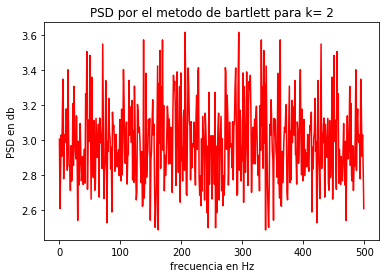

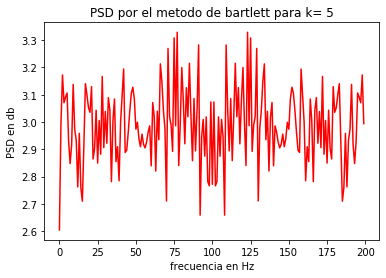

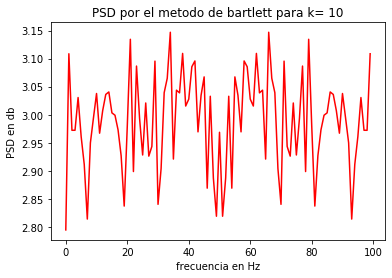

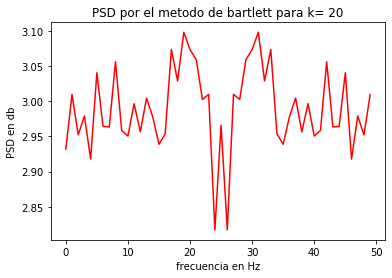

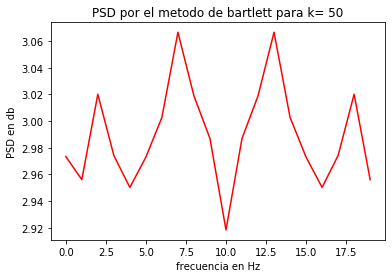

In [12]:
# Simular para los siguientes tamaños de señal


##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N=1000
M=200
K=np.array([2,5,10,20,50],dtype=np.float)  #numero de solapamientos
media=np.array([0,0,0,0,0],dtype=np.float)
varianza=np.array([0,0,0,0,0],dtype=np.float)
x=np.zeros((M,N),dtype=float)
med_xl=np.zeros((M,1),dtype=float)
var_xl=np.zeros((M,1),dtype=float)
mu=0
var_x=(2)**(1/2)
for ii in range(M):
    x[ii,:]=np.random.normal(mu,var_x,N)
#Xn=np.zeros((N,1)).flatten()
Xn=[]
ll=0

for ii in K:
    L=int(N/ii)
    XT=np.zeros((L,1)).flatten()
    for row in range(M):
        Xl=np.zeros((L,1)).flatten()
        for jj in range(int(ii)):
            xl=x[row,jj*L:(jj+1)*L].flatten()
            aux=(1/N)*(np.abs(np.fft.fft(xl)))**2
            Xl+=aux

        med_xl[row]=np.mean(Xl)
        var_xl[row]=np.var(Xl)
        XT+=(1/M)*Xl    
    media[ll]=np.mean(med_xl)
    varianza[ll]=np.mean(var_xl)
    ll +=1
    ff=np.linspace(0,(L-1),L)
    plt.figure()
    plt.plot(ff,10*np.log10(XT),'r')
    plt.title('PSD por el metodo de bartlett para k= %d'%int (ii) )
    plt.ylabel('PSD en db')
    plt.xlabel('frecuencia en Hz')
    plt.show()
    Xn=[]
    
    
    
    


In [13]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados_bartlett = [ 
                   [media[0]-2, varianza[0]], # <-- acá debería haber numeritos :)
                   [media[1]-2, varianza[1]], # <-- acá debería haber numeritos :)
                   [media[2]-2, varianza[2]], # <-- acá debería haber numeritos :)
                   [media[3]-2, varianza[3]], # <-- acá debería haber numeritos :)
                   [media[4]-2, varianza[4]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados_bartlett, columns=['$s_B$', '$v_B$'],
               index=K)
HTML(df.to_html())



,$s_B$,$v_B$
2.0,-0.009482,1.984375
5.0,-0.009482,0.791414
10.0,-0.009482,0.400877
20.0,-0.009482,0.198702
50.0,-0.009482,0.078740


<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

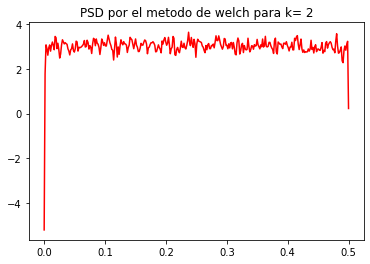

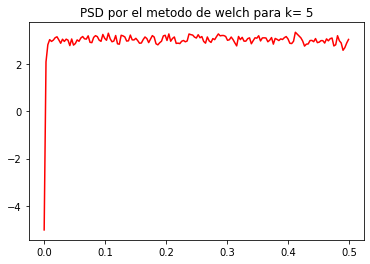

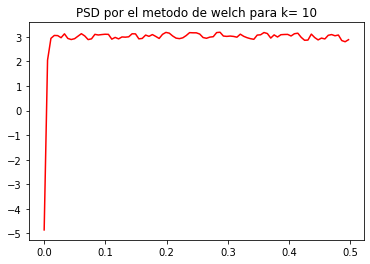

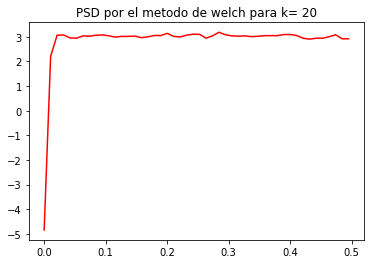

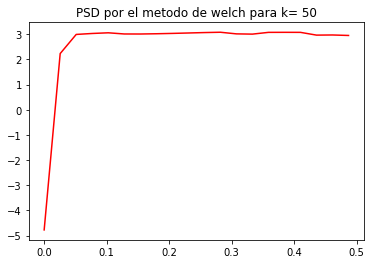

In [14]:
# Simular para los siguientes tamaños de señal
N = 1000
slp = 50 # por ciento de ventanas adyacentes
K = np.array([2, 5, 10, 20, 50], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

N = 1000
M=200
slp = 50 # por ciento de ventanas adyacentes
K = np.array([2,5,10,20,50], dtype=np.float)
varianza=np.array([0,0,0,0,0], dtype=np.float)
media=np.array([0,0,0,0,0], dtype=np.float)
mu=0
var_x=(2)**(1/2)
x=np.zeros((M,N),dtype=float)
med_row=np.zeros((M,1),dtype=float)
var_row=np.zeros((M,1),dtype=float)
XW=0.0


ll=0
for ii in range(M):
    x[ii,:]=np.random.normal(mu,var_x,N)

for ii in K:
    L=int(2*N/(ii+1))
    for row in range(M):
        ff,xw=signal.welch(x[row,:],nperseg=L)
        var_row[row]=np.var(xw/2)       #La division por 2 se debe a la normalizacion de scipy signal
        med_row[row]=np.mean(xw/2)      #tambien lo compare con los resultados del periodograma y bartlett y la media daba el doble
        #tambien se hace esta desnormalizacion  en el ejemplo del metodo de welch del jupiter de sascha sport
        XW += (1/M)*0.5*xw
        
    media[ll]=np.mean(med_row)              
    varianza[ll]=np.mean(var_row)               
    plt.figure()
    plt.plot(ff,10*np.log10(XW),'-r')               
    plt.title('PSD por el metodo de welch para k= %d'%int (ii) )
    plt.show()
    ll +=1
    XW=0
    


In [15]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados_welch = [ 
                   [media[0]-2, varianza[0]], # <-- acá debería haber numeritos :)
                   [media[1]-2, varianza[1]], # <-- acá debería haber numeritos :)
                   [media[2]-2, varianza[2]], # <-- acá debería haber numeritos :)
                   [media[3]-2, varianza[3]], # <-- acá debería haber numeritos :)
                   [media[4]-2, varianza[4]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados_welch, columns=['$s_B$', '$v_B$'],
               index=K)
HTML(df.to_html())



,$s_B$,$v_B$
2.0,0.002097,2.061828
5.0,-0.000224,1.045895
10.0,-0.015349,0.445206
20.0,-0.034305,0.272250
50.0,-0.093787,0.211333


<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

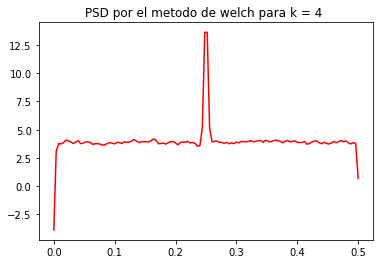

El estimador de frecuencia es =252


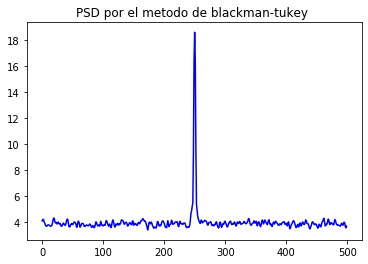

El estimador de frecuencia por blackman-tukey es =250


In [22]:
# Simular para los siguientes tamaños de señal

R = 200 # realizaciones

N = 1000 # Muestras

# Obtené los valores XX para que cumplas con el enunciado
#SNR = np.array([ XX, XX ], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
N=1000
M=200
mu=0
des_est=2**(1/2)
a1=1.25
fs=1000
f0=(fs/4)
fr=np.random.uniform(-1/2,1/2,size=(M,N))
nt=np.random.normal(mu,des_est,size=(M,N))
om0=np.pi*2
om1=om0+4*fr*2*np.pi/N
tt=np.linspace(0,(N-1)/fs,N)
x=a1*np.sin(om1*f0*tt)+nt

XT=np.zeros((126))

for ii in range(M):
    ff,X=signal.welch(x[ii,:]   ,nperseg=250)

    XT+=(1/M)*0.5*X


plt.figure(2)
plt.plot(ff,10*np.log10(np.abs(XT)),'-r')
plt.title('PSD por el metodo de welch para k = 4 ' )
plt.show()
print('El estimador de frecuencia es =%d'%(4*np.argmax(XT)))







XBT=np.zeros(N)
ffbt=np.linspace(0,(N-1),N)
for ii in range(M):
    xc=(1/N * signal.correlate(x[ii,:],x[ii,:],mode='same'))*signal.hann(N)
#    for jj in range()
    Xbt=np.abs(np.fft.fft(xc))
    XBT+=1/M*Xbt
ibt=np.argmax(XBT)
plt.figure(3)
plt.plot(ffbt[:int(N/2)],10*np.log10(XBT[:int(N/2)] ),'-b')
plt.title('PSD por el metodo de blackman-tukey ' )
plt.show()
print('El estimador de frecuencia por blackman-tukey es =%d'%(np.argmax(XBT)))







   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b>Elegi el metodo de Blackman-tukey ya que se diferencia los metodos de promediado de periodograma como el de welch ,ya que estima la correlacion con una ventana que permite atenuar el problema del calculo de correlacion para indices cercanos a N.
</div>


   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

In [21]:

#######################################
# Tu simulación que genere resultados #
#######################################
'''SRN de 10 db se da para a1=1.25 y sigma_cuad=2 '''
'''SRN de 3 db se da para a1=0.4 y sigma_cuad=2 '''

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   [248, 248], # <-- acá debería haber numeritos :)
                   [250, 250] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$i_W$', '$i_X$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())




,$i_W$,$i_X$
3 dB,248,248
10 dB,250,250
